In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Let's read the first n rows of the file "yt_with_less_col_2020_01.csv" inside the folder interim in data
yt_districts_df = pd.read_csv("data/out/yt_districts_cleaned.csv", usecols=["tpep_pickup_datetime","tpep_dropoff_datetime","trip_distance","PULocationID","DOLocationID","fare_amount","congestion_surcharge"])
yt_districts_df["PM"]=pd.Series({})
yt_districts_df.reset_index(inplace=True)
yt_districts_df.head()

/var/folders/1k/vynjj6l53696kyf1_6syqjtm0000gn/T/ipykernel_15945/2275985180.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  yt_districts_df["PM"]=pd.Series({})


,index,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,congestion_surcharge,PM
0,0,1577838495,1577838783,1.2,Manhattan,Manhattan,6.0,2.5,NaN
1,1,1577838939,1577839384,1.2,Manhattan,Manhattan,7.0,2.5,NaN
2,2,1577839661,1577840032,0.6,Manhattan,Manhattan,6.0,2.5,NaN
3,3,1577838541,1577839228,0.7,Manhattan,Manhattan,8.0,2.5,NaN
4,4,1577840111,1577841123,2.4,Manhattan,Manhattan,12.0,2.5,NaN


In [10]:
#Lets compute 
yt_districts_df["PM"]=yt_districts_df["index"].apply(lambda x: yt_districts_df["fare_amount"][x]/yt_districts_df["trip_distance"][x])

In [11]:
yt_districts_df

,index,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,congestion_surcharge,PM
0,0,1577838495,1577838783,1.20,Manhattan,Manhattan,6.0,2.5,5.000000
1,1,1577838939,1577839384,1.20,Manhattan,Manhattan,7.0,2.5,5.833333
2,2,1577839661,1577840032,0.60,Manhattan,Manhattan,6.0,2.5,10.000000
3,3,1577838541,1577839228,0.70,Manhattan,Manhattan,8.0,2.5,11.428571
4,4,1577840111,1577841123,2.40,Manhattan,Manhattan,12.0,2.5,5.000000
...,...,...,...,...,...,...,...,...,...
5723985,5723985,1580511601,1580512891,4.11,Manhattan,Manhattan,17.5,2.5,4.257908
5723986,5723986,1580513887,1580514741,2.10,Manhattan,Manhattan,11.0,2.5,5.238095
5723987,5723987,1580511618,1580512758,2.13,Manhattan,Manhattan,13.0,2.5,6.103286
5723988,5723988,1580513062,1580514039,2.55,Manhattan,Manhattan,12.5,2.5,4.901961


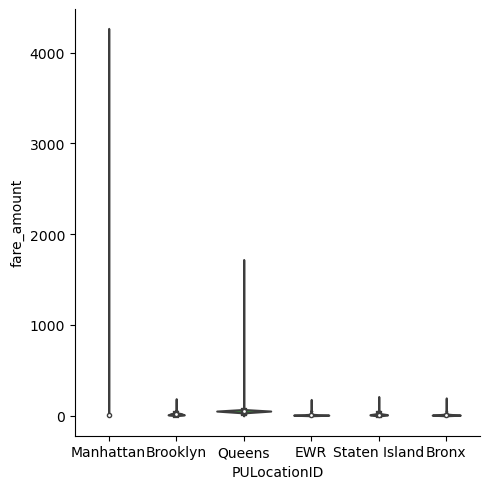

In [14]:
sns.catplot(data=yt_districts_df, x="PULocationID", y="fare_amount", kind="violin")

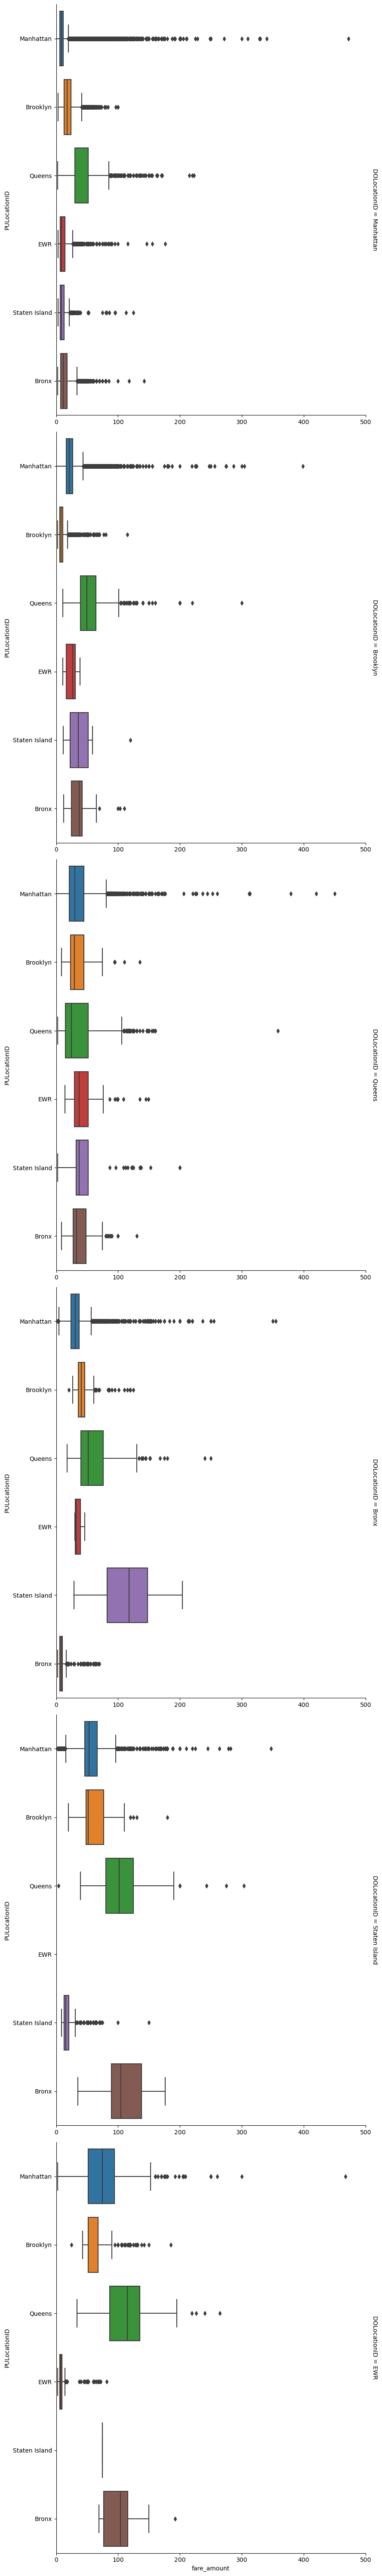

In [31]:
g = sns.catplot(
    data=yt_districts_df,
    x="fare_amount", y="PULocationID", row="DOLocationID",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=10, aspect=0.9
)

g.set(xlim=(0,500))